#### 선형회귀(Linear Regression)

In [1]:
# 사이킷런에서 당뇨병 환자 데이터 가져오기
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [2]:
# 입력데이터와 타깃 데이터 크기 확인하기
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


> 442개의 샘플과 10개의 Feature로 구성되어 있다.

In [ ]:
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [6]:
diabetes.target[:3]

array([151.,  75., 141.])

##### 컬럼의 의미
diabetes data set의 특성 목록
- age : 환자의 나이 
- sex : 성별 
- bmi : 체질량 지수
- bp : 평균 혈압
- s1 : 혈청 수치 1(HDL 콜레스테롤 수치)
- s2 : 혈청 수치 2(LDL 콜레스테롤 수치)
- s3 : 혈청 수치 3(총 콜레스테롤 수치)
- s4 : 혈청 수치 4(혈청 트리글리세이드 수치)
- s5 : 혈청 수치 5(혈당 수치)
- s6 : 혈청 수치 6(기타 혈액 측정 수치)
: diabetes의 target은 1년후의 당뇨병 진행 상황을 수치화 한것 

#### 당뇨병 환자 데이터 시각화 하기
: 3번특성인 bmi 선택

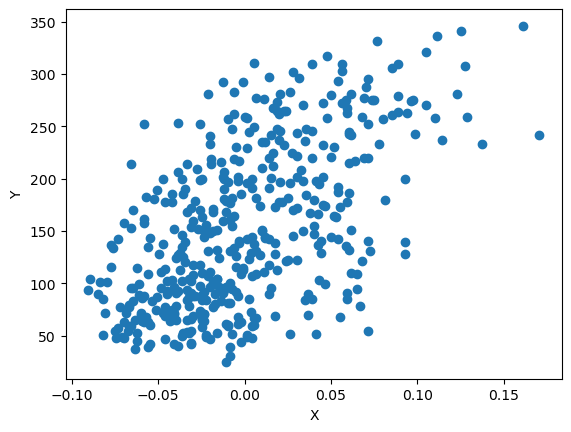

In [7]:
import matplotlib.pyplot as plt

plt.scatter(
    diabetes.data[:,2],
    diabetes.target
)

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##### 예측값(y^)으로 올바른 모델 찾기
- 훈련데이터에 잘 맞는 w와 b를 찾는 방법(Y^ = wX + b)
(1) 무작위로 w와b를 정한다.     
(2) X에서 샘플 하나를 선택하여 Y^을 계산합니다.   
(3) Y^과 선택한 샘플의 Y를 비교합니다.(예측값과 정답 비교하기 : 손실함수)     
(4) Y^이 Y와 가까워지도록 w,b를 조정한다.(모델 조정)    
(5) 모든 샘플이 처리될때까지 다시 (2)~(5)항목을 반복 합니다.  


In [8]:
# 데이터 준비
x = diabetes.data[:,2]
y = diabetes.target

In [9]:
# 초기의 w와 b값 정하기
w = 1.0
b = 1.0

In [10]:
# 첫번째 샘플로 계산하기
y_hat = w * x[0] + b
y_hat

1.0616962065186832

In [11]:
# 실제값
y[0]

151.0

In [12]:
# 실제값과 가까워지기 위해 w와 b를 조금씩 변경해서 y_hat이 증가하는지 감소하는지 파악
# w를 0.1만큼 증가하자
w_inc = w+0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc

1.0678658271705517

In [13]:
# w값을 조정한후 예측값 증가 정도 확인
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868429

w_rate = (y_hat_inc - y_hat) / (w_inc - w)    
= ((w_inc * x[0] + b) - (w * x[0] + b)) / (w_inc - w)    
= x[0] * (w-inc - w) / (w_inc - w) = x[0]     
#### 변화율은 결국 훈련데이터의 샘플인 x[0] 이다. 

----
##### 변화율(Gradient: 경사, 기울기)로 가중치 및 절편 업데이트 하기

In [14]:
w_new = w + w_rate
w_new

1.0616962065186843

In [16]:
# b를 0.1만큼 증가시킨후 변화율로 절편 업데이트 하기
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [17]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
b_rate

1.0

b_rate = (y_hat_inc - y_hat) / (b_inc - b)    
= ((x[0] * w + b_inc) - (x[0] * w + b)) / (b_inc - b)    
= b_inc - b / b_inc - b = 1
#### bias의 변화율은 1입니다. 

In [18]:
b_new = b + 1
b_new

2.0

-----
##### 오차 역전파(back propagation)로 가중치와 절편을 더 적절하게 업데이트 하기
: 오차와 변화율을 곱하여 가중치 업데이트 하기

In [19]:
# x[0]
err = y[0] - y_hat
w_new = w + w_rate * err # 변화율에 오차를 곱한다. 
b_new = b + 1 * err 
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [20]:
# x[1]
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat 

w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [21]:
# x[2]
y_hat = x[2] * w_new + b_new
err = y[2] - y_hat 

w_rate = x[2]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

17.014719208776086 140.3718013346938


#### 전체 샘플을 반복하기

In [22]:
w = 1
b = 1
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

print(w, b)

587.8654539985616 99.4093556453094


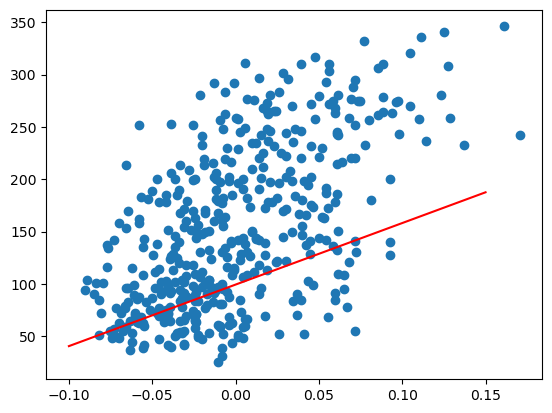

In [24]:
# 산점도에 직선을 넣어 잘 되었는지 확인하기

plt.scatter(
    x,
    y
)

pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)

plt.plot(
    [pt1[0], pt2[0]],
    [pt1[1], pt2[1]],
    color = 'red'
)

plt.show()

#### Epoch로 반복하기 
: 경사하강법에서는 보통 주어진 훈련데이터로 학습을 여러번 반복 합니다.

In [25]:
# epoch를 100으로 하자 
w = 1
b = 1
for _ in range(100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err

print(w, b)

913.5973364346786 123.39414383177173


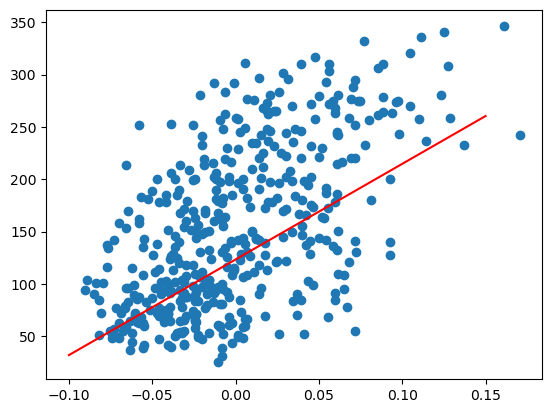

In [26]:
# 산점도에 직선을 넣어 잘 되었는지 확인하기

plt.scatter(
    x,
    y
)

pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)

plt.plot(
    [pt1[0], pt2[0]],
    [pt1[1], pt2[1]],
    color = 'red'
)

plt.show()